# CNN Model for CIFAR 10 dataset AlexNet Type CNN

In [1]:
# import libraries

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# GPUs

# Training on GPU

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

device

device(type='cuda', index=0)

In [3]:
# transforming PILImage images of range [0, 1] to transform to range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
# importing CIFAR 10 datasets

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', download=True, train=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', download=True, train=False, transform=transform)

# Data loader

train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(dataset=testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# toshow the training images

import matplotlib.pyplot as plt
import numpy as np


In [6]:
# function to show the image

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

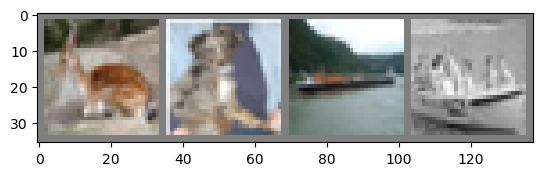

deer  dog   ship  ship 


In [7]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
                    
# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [8]:
# Define a simple Convolution NN
#
#import torch.nn as nn
#import torch.nn.functional as F
#
#class Net(nn.Module):
#    # constructor
#    def __init__(self):
#        super(Net, self).__init__()
#        self.conv1 = nn.Conv2d(3, 16, 5)
#        self.pool = nn.MaxPool2d(2, 2)
#        self.conv2 = nn.Conv2d(16, 64, 5)
#        self.fc1 = nn.Linear(64 * 5 * 5, 400)
#        self.fc2 = nn.Linear(400, 120)
#        self.fc3 = nn.Linear(120, 10)
#        
#    def forward(self, x):
#        x = self.pool(F.relu(self.conv1(x)))
#        x = self.pool(F.relu(self.conv2(x)))
#        x = torch.flatten(x, 1)   # flatte all batches except batch
#        x = F.relu(self.fc1(x))
#        x = F.relu(self.fc2(x))
#        x = self.fc3(x)
#        
#        return x

# Defining the AlexNet Convolutional NN

class AlexNet(nn.Module):
    # AlexNet proposed by paper 
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        # input image is (b * 3 * 32 * 32)
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=5),  # (b x 96 x 55 x 55)
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),  # section 3.3
            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 96 x 27 x 27)
            nn.Conv2d(96, 256, 5, padding=2),  # (b x 256 x 27 x 27)
            nn.ReLU(),
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),
            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 256 x 13 x 13)
            nn.Conv2d(256, 384, 3, padding=1),  # (b x 384 x 13 x 13)
            nn.ReLU(),
            nn.Conv2d(384, 384, 3, padding=1),  # (b x 384 x 13 x 13)
            nn.ReLU(),
            nn.Conv2d(384, 256, 3, padding=1),  # (b x 256 x 13 x 13)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 256 x 6 x 6)
        )

'import torch.nn as nn\nimport torch.nn.functional as F\n\nclass Net(nn.Module):\n    # constructor\n    def __init__(self):\n        super(Net, self).__init__()\n        self.conv1 = nn.Conv2d(3, 16, 5)\n        self.pool = nn.MaxPool2d(2, 2)\n        self.conv2 = nn.Conv2d(16, 64, 5)\n        self.fc1 = nn.Linear(64 * 5 * 5, 400)\n        self.fc2 = nn.Linear(400, 120)\n        self.fc3 = nn.Linear(120, 10)\n        \n    def forward(self, x):\n        x = self.pool(F.relu(self.conv1(x)))\n        x = self.pool(F.relu(self.conv2(x)))\n        x = torch.flatten(x, 1)   # flatte all batches except batch\n        x = F.relu(self.fc1(x))\n        x = F.relu(self.fc2(x))\n        x = self.fc3(x)\n        \n        return x'

In [9]:
model = Net().to(device)
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)

In [10]:
# define criterion, optimizer and loss function

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [11]:
# TRain hte model

for epoch in range(3):
    
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
             # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.124
[1,  4000] loss: 1.720
[1,  6000] loss: 1.553
[1,  8000] loss: 1.473
[1, 10000] loss: 1.392
[1, 12000] loss: 1.321
[2,  2000] loss: 1.228
[2,  4000] loss: 1.186
[2,  6000] loss: 1.153
[2,  8000] loss: 1.111
[2, 10000] loss: 1.074
[2, 12000] loss: 1.066
[3,  2000] loss: 0.943
[3,  4000] loss: 0.930
[3,  6000] loss: 0.927
[3,  8000] loss: 0.902
[3, 10000] loss: 0.878
[3, 12000] loss: 0.896
Finished Training


In [15]:
# Test
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test inputs: %d %%' % (100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(3):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of the network on the 10000 test inputs: 69 %
Accuracy of plane : 79 %
Accuracy of   car : 86 %
Accuracy of  bird : 54 %
Accuracy of   cat : 56 %
Accuracy of  deer : 51 %
Accuracy of   dog : 59 %
Accuracy of  frog : 82 %
Accuracy of horse : 75 %
Accuracy of  ship : 74 %
Accuracy of truck : 69 %
